# Markov chains and Detailed balance
![image](https://asset.montecarlosbm.com/styles/hero_image_desktop/public/media/orphea/sbm_casinos_10_2017_place_du_casinosoir_16_id111623_rsz.jpg?itok=7JntdNWY)

Monte Carlo algorithms are quite useful in many areas, its name refers to the grand casino in the Principality of Monaco at Monte Carlo, which is well-known around the world as an icon of gambling. 

A very good example of this can be the Monte Carlo algorithm to compute $\pi$ it is done easily by randomly throwing rocks into a squared and then counting the number of rocks that end inside the circle and those that did not. according to the geometrical relation if the length of a size of the square is 2, then the circle inside the square will be of radius 1 and the ratio between the areas will be 
$$
\frac{A_{c}}{A_s} = \frac{\pi}{4}
$$
meaning that the number of tries that end up inside the circle divided by the total number of tries could give us the ratio $\pi/4$ and then we are able to compute $\pi$ by experimentation.

Of course as every Monte Carlo algorithm it takes multiple tries to work, otherwise the result is not accurate.
Here below we show an example of this below

In [1]:
# nbi:hide_in
import matplotlib.pylab as plt
import numpy as np
from IPython.display import display, HTML


display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

X=np.random.uniform(-1,1,100)
Y=np.random.uniform(-1,1,100)
circle_x=X[X**2+Y**2<1]
circle_y=Y[X**2+Y**2<1]
square_x=X[X**2+Y**2>1]
square_y=Y[X**2+Y**2>1]
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot([-1,-1],[-1,1],color="b")
plt.plot([1,1],[-1,1],color="b")
plt.plot([-1,1],[-1,-1],color="b")
plt.plot([-1,1],[1,1],color="b")
circ=plt.Circle((0,0), radius=1)
circle = plt.Circle((0, 0), 1, facecolor='none',edgecolor="r", linewidth=3, alpha=0.5)
ax.add_patch(circle)
plt.scatter(circle_x,circle_y,s=5)
plt.scatter(square_x,square_y,s=5)
plt.xticks([])
plt.yticks([])
plt.title(r"Estimated of $\pi$ ={} with {}".format(4*len(circle_x)/len(X),len(X)))
ax.axis('off')
plt.axis('scaled')
plt.show()

<Figure size 600x600 with 1 Axes>

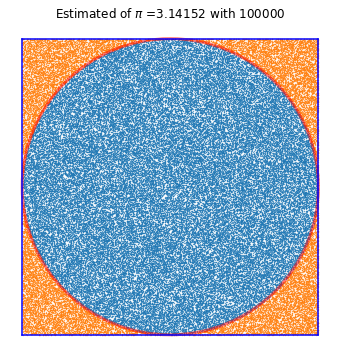

In [2]:
# nbi:hide_in
X=np.random.uniform(-1,1,100000)
Y=np.random.uniform(-1,1,100000)
circle_x=X[X**2+Y**2<1]
circle_y=Y[X**2+Y**2<1]
square_x=X[X**2+Y**2>1]
square_y=Y[X**2+Y**2>1]
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot([-1,-1],[-1,1],color="b")
plt.plot([1,1],[-1,1],color="b")
plt.plot([-1,1],[-1,-1],color="b")
plt.plot([-1,1],[1,1],color="b")
circ=plt.Circle((0,0), radius=1)
circle = plt.Circle((0, 0), 1, facecolor='none',edgecolor="r", linewidth=3, alpha=0.5)
ax.add_patch(circle)
plt.scatter(circle_x,circle_y,s=0.1)
plt.scatter(square_x,square_y,s=0.1)
plt.xticks([])
plt.yticks([])
plt.title(r"Estimated of $\pi$ ={} with {}".format(4*len(circle_x)/len(X),len(X)))
ax.axis('off')
plt.axis('scaled')
plt.show()

As you can see it depends strongly in the number of tries we make and in theory if the tries goes to infinity it gets a better result.
A simple way to implement the last thing is python is by randomly sample two coordinates ($x,y$) and then as if they are inside the circle.

```python
import random
n_trials = 4000
n_hits = 0
for iteration in range(n_trials):
    x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
    if x**2 + y**2 < 1.0: 
        n_hits += 1
print (4.0 * n_hits / float(n_trials))
```
it outputs for this test

```python
3.154
```
and if you may want to test this code many times and then see what all outputs give you may want to put the last code in a function and then try many times

```python
def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits
 
n_runs = 10
n_trials = 4000
for run in range(n_runs):
    print 4.0 * direct_pi(n_trials) / float(n_trials)
```

this code outputs
```python
3.133
3.147
3.131
3.174
3.119
3.171
3.137
3.13
3.114
3.105
```

## 1. Exercise
Use the last code  and modify it so that it computes the root mean square (rms) deviation:

rms deviation=$\frac{1}{n_{runs}}\sum^{n_{runs}−1}_{i=0}\sqrt{(π_{est}^{i}−π)^2}$
, where $pi^{est}_i$ is the estimation of pi in run i of the function ``direct_pi``, while $pi = 3.1415926...$ is the mathematical constant.

NB: In the rms deviation, one squares the difference so that positive and negative deviations add up, rather than compensate each other. At the end, one takes a square root in order to "undo" the squaring.

Take n_runs = 500, and plot the rms deviation according to the above formula as a function of n_trials for n_trials = 2^4, 2^5,...,2^12 (use log-log-scaling of axes). what can you say about the plot why does it gives you any information about the behaviour of the convergence of the algorithm?

The result should look something like

# Solution
Here we implement the same as the code before but this time we compute the RMS.
__Note:__ here i had a typo and the real formula was $\sqrt{\frac{1}{n_{runs}}\sum^{n_{runs}−1}_{i=0}(π_{est}^{i}−π)^2}$. but the behaviuor is the same.

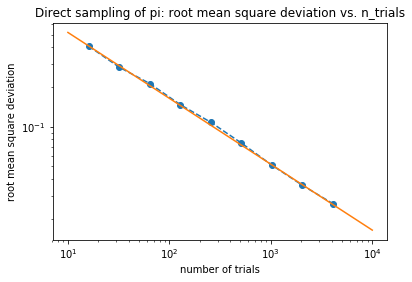

In [3]:

import random, math, pylab

def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits

n_runs = 500
n_trials_list = []
sigmasqs = []
for poweroftwo in range(4, 13):
    n_trials = 2 ** poweroftwo
    sigmasq = 0.0
    for run in range(n_runs):
        pi_est = 4.0 * direct_pi(n_trials) / float(n_trials)
        sigmasq += (pi_est - math.pi) ** 2
    sigmasqs.append(math.sqrt(sigmasq/(n_runs)))
    n_trials_list.append(n_trials)

pylab.plot(n_trials_list, sigmasqs, '--o')
pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.title('Direct sampling of pi: root mean square deviation vs. n_trials')
pylab.savefig('direct_sampling_rms_deviation.png')
pylab.plot([10.0, 10000.0], [1.642 / math.sqrt(10.0), 1.642 / math.sqrt(10000.0)])
pylab.show()

# Exercise 2 (other way to compute $\pi$ Markov chain)
Consider the same problem than before but this time we are going to throw a pebble and then throw it again and again, what we are going to do is start in a random point in the square and then play this game as many times as we want. How ever, we could ask what happen if we reach an edge and then we throw the pebble outside the square.
Your task s to see how this effect the way we sample and why this is important to take into account.

An illustration of this situation is shown below.

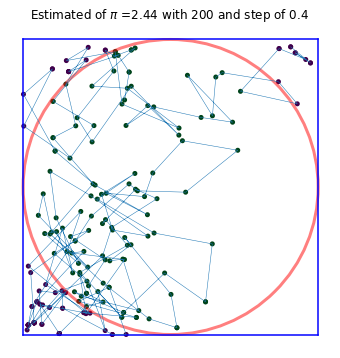

In [5]:
# nbi:hide_in
N=200
delta=0.4
x, y = random.uniform(-1,1), random.uniform(-1,1)
X,Y=[],[]
n_hits = 0
for i in range(N):
    del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
    X.append(x)
    Y.append(y)
    if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
        x, y = x + del_x, y + del_y
    if x**2 + y**2 < 1.0: n_hits += 1
X=np.array(X)
Y=np.array(Y)
a=np.ones(len(X))
a[(X**2+Y**2>1)]=-1
a=5*a
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot([-1,-1],[-1,1],color="b")
plt.plot([1,1],[-1,1],color="b")
plt.plot([-1,1],[-1,-1],color="b")
plt.plot([-1,1],[1,1],color="b")
circ=plt.Circle((0,0), radius=1)
circle = plt.Circle((0, 0), 1, facecolor='none',edgecolor="r", linewidth=3, alpha=0.5)
ax.add_patch(circle)
plt.scatter(X,Y,linewidth=2,marker=".",linestyle="-",c=a,cmap="PRGn")
plt.plot(X,Y,linewidth=0.5)
plt.xticks([])
plt.yticks([])
plt.title(r"Estimated of $\pi$ ={} with {} and step of {}".format(4*n_hits/len(X),len(X),delta))
ax.axis('off')
plt.axis('scaled')
plt.show()

1. Implement a function that uses this logic of start in a random point of a square and then throw in a random direction (this can be done by adding to the position (x,y) a random point $\delta$ which is going to be a step and then the position changes as ($x+\delta$,$y+\delta$) this first implementation should consider the condition that if you reach an edge and the next move is outside the square then you start again and do not take into account this try.
2. Implement a function as the one before but this time if you reach an edge and you choose a step such that takes you outside the squared you decide to stay in the same pint but you take into account that try.

3. Compare both results

4. use the code implemented in 2, and choose different size of step $\delta$ and compute the rms as before and plot again using log-log scaling, use a number of steps n_trials = 2^4, 2^5,...,2^12 

The result should look something like

# Solution
The only thing to change here is that we walk through the square with a random step $\delta$

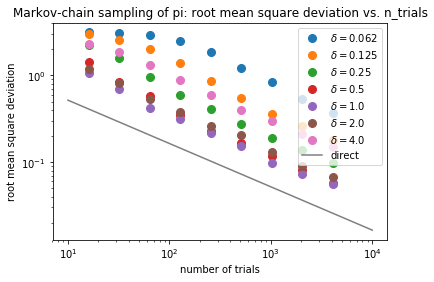

In [4]:

import random, math, pylab

def markov_pi(N, delta):
    x, y = 1.0, 1.0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
    return n_hits

n_runs = 500
for delta in [0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]:
    n_trials_list = []
    sigmas = []
    for poweroftwo in range(4, 13):
        n_trials = 2 ** poweroftwo
        sigma = 0.0
        for run in range(n_runs):
            pi_est = 4.0 * markov_pi(n_trials, delta) / float(n_trials)
            sigma += (pi_est - math.pi) ** 2
        sigmas.append(math.sqrt(sigma/(n_runs)))
        n_trials_list.append(n_trials)
    pylab.plot(n_trials_list, sigmas, 'o', ms = 8, label = '$\delta = $' + str(delta))

pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.plot([10,10000],[1.642 / math.sqrt(10.0), 1.642 / math.sqrt(10000.0)], label = 'direct')
pylab.title('Markov-chain sampling of pi: root mean square deviation vs. n_trials')
pylab.legend(loc='upper right')
pylab.savefig('markov_sampling_rms_deviation.png')
pylab.show()

* Which of the values of delta gives the most precise results?
* Explain why VERY small values of delta and VERY large values of delta yield a less precise result than intermediate values.
* Explain in a few words why the error is larger than for the direct sampling algorithm, even for the optimal value of delta.

# Exercise 3
This exercise consist in a simple game of a ball that is in a grid of 3 by 3 elements, the ball can be in one and only one of these parts at a time. the idea of this exercise is to implement the move of the ball inside this grid with the following rules:
1. The ball has the same probability to move towards any direction.
2. If the ball is in one corner the probability of staying in the same position is 1/2
3. The ball can start randomly in any position of the grid and then it evolves

![gif](https://raw.githubusercontent.com/JoseMontanaC/Laboratorio-Metodos-Computacionales/master/result.gif)
* Implement a code that recreates the dynamics of the ball.
* Let the ball start at any point of the grid and let it evolve a long time (1000 steps), record the positions the ball visited and then do an histogram of the places it visit. After this try for shorter times and record as well the positions the ball visited.
* After you have done this you will see that for a long time the distribution it follows is an uniform distribution. we say that when it reach an uniform distribution we reached equilibrium and that's the reason why this is useful to simulate molecular systems that are in equilibrium. To study this we are going to see how fast this reaches equilibrium. Since equilibrium is by definition when the distribution of the positions of the ball becomes uniform we can see at every step how far our distribution is from the uniform, and the best way to study the distance between 2 distributions is using the [Kullback–Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) and is given by the formula
$$
{\displaystyle D_{\text{KL}}(P\parallel Q)=\sum _{x\in {\mathcal {X}}}P(x)\log \left({\frac {P(x)}{Q(x)}}\right).}
$$
That for our case we take $P(x)$ as the distribution followed by our data at every step and $Q(x)$ is the uniform distribution ($Q(x)=1/n$ with $n$ the number of points). Implement the KL-divergence and plot the distance of the given distribution as a function of the number of steps. What can you conclude from that plot?

# Solution
First we plot the square and see how the ball evolves i will put it in the upper right corner but the result is independent of the place i put it first.

In [6]:
import random, matplotlib.pylab as plt

sigma = 0.4  
# sigma and s_map are needed for the graphical output, do not put attention if you don't understand it
# 
s_map = [(1.0, 1.0), (2.0, 1.0), (3.0, 1.0), 
         (1.0, 2.0), (2.0, 2.0), (3.0, 2.0), 
         (1.0, 3.0), (2.0, 3.0), (3.0, 3.0)] 

neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]] 
# Here we define the possible neighbours (the cells) it has at echa position

# function to plot the square and the ball
def plot_ball(position,run):
    cir = plt.Circle(s_map[position], radius=sigma, fc='r')
    plt.gca().add_patch(cir)
    plt.plot([0.5, 3.5], [1.5, 1.5], 'b')
    plt.plot([0.5, 3.5], [2.5, 2.5], 'b')
    plt.plot([1.5, 1.5], [0.5, 3.5], 'b')
    plt.plot([2.5, 2.5], [0.5, 3.5], 'b')
    if run < 10: number_string = '0'+str(run)
    else: number_string = str(run)
    plt.title('t = '+ number_string)
    plt.axis('scaled')
    plt.axis([0.5, 3.5, 0.5, 3.5])
    plt.xticks([])
    plt.yticks([])
    #plt.savefig('pebble_basic_movie_'+number_string+'.png', transparent=False)
    plt.show()

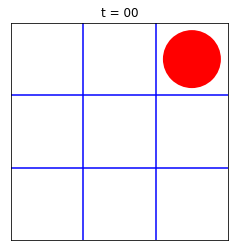

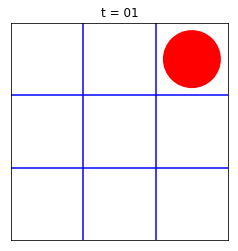

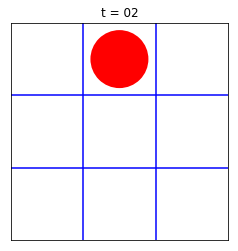

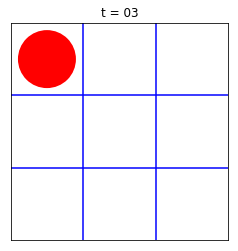

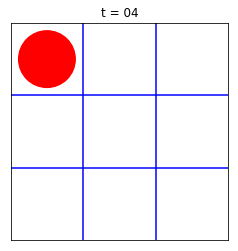

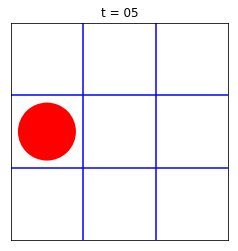

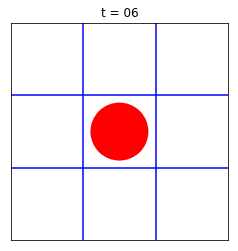

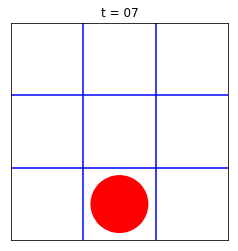

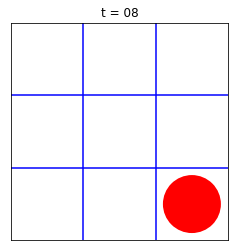

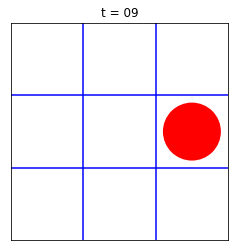

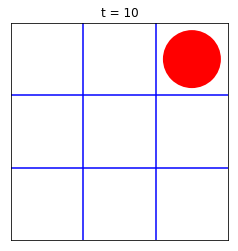

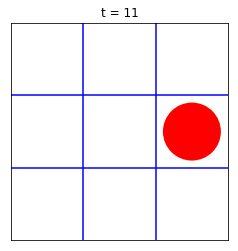

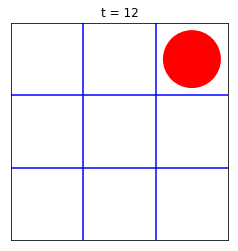

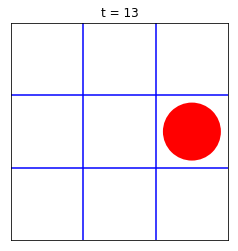

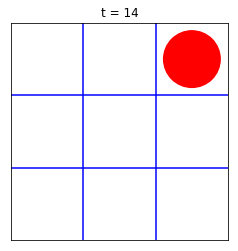

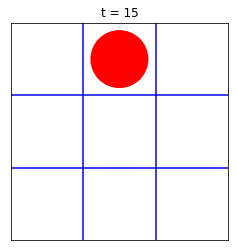

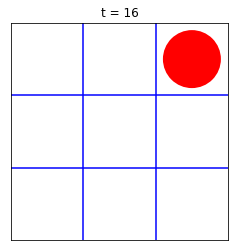

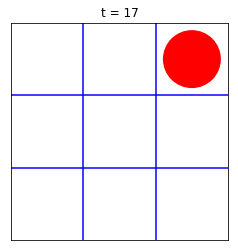

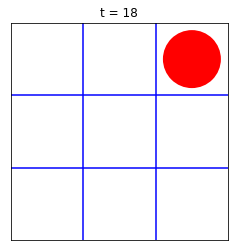

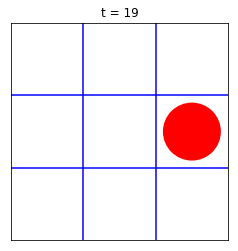

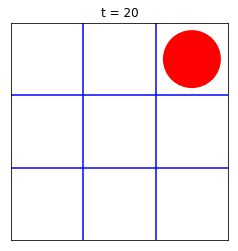

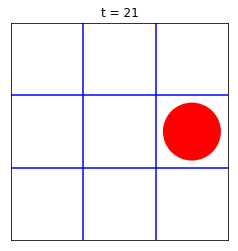

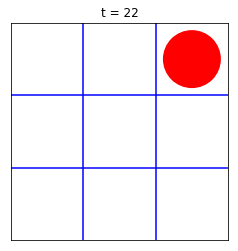

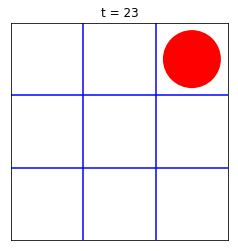

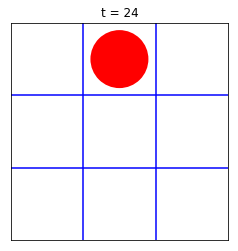

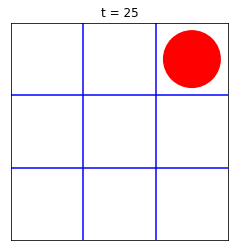

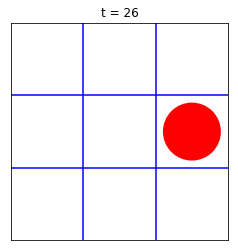

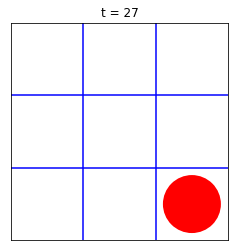

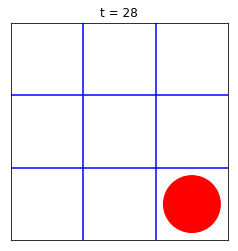

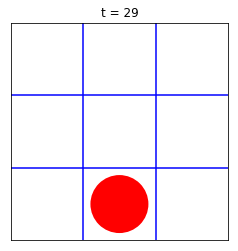

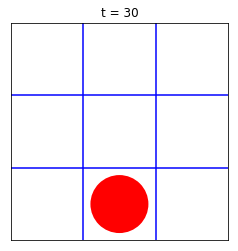

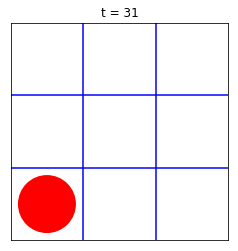

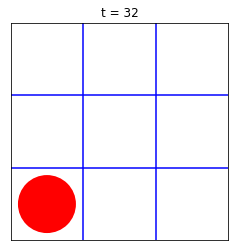

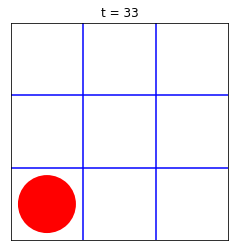

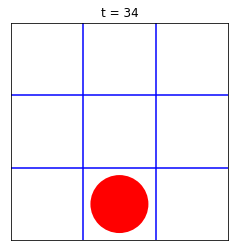

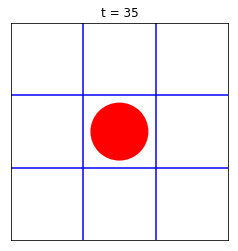

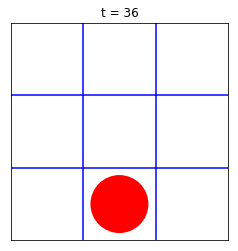

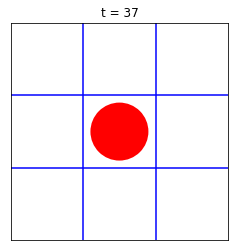

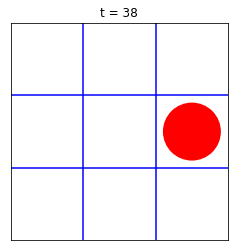

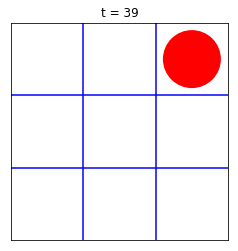

In [9]:
site = 8 # the part where it starts
N_runs = 40 # the number of times i let it evolve
histogram=[]
for run in range(N_runs):
    histogram.append(site)#save the position to store it and plot the histogram
    # Begin of graphical output
    plot_ball(site,run)
    # End of graphical output
    site = neighbor[site][ random.randint(0, 3)]

therefore the histogram for 40 runs looks as

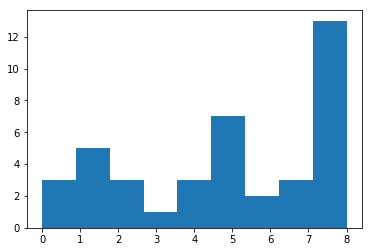

In [11]:
plt.hist(histogram,bins=9);

Now that we have the main function to compute the histogram we define the KL-divergence and compute the distance between the distributions

In [12]:
def KL_divergence(P,Q):
    # Here P and Q are numpy arrays
    result=0
    for i in range(len(P)):
        if P[i]==0 or P[i]==1:
            result+=0
        else:
            result+=P[i]*np.log(P[i]/Q[i])
    return result
uniform=np.ones(9)/9
N_runs_total =np.logspace(2,7)
KL_results=[]
for N_runs in N_runs_total:
    site = 8 # the part where it starts
    histogram=[]
    for run in range(int(N_runs)):
        histogram.append(site)
        # End of graphical output
        site = neighbor[site][random.randint(0, 3)]
    P,bins=np.histogram(histogram,density=True,bins=9)
    KL_results.append(KL_divergence(P,uniform))

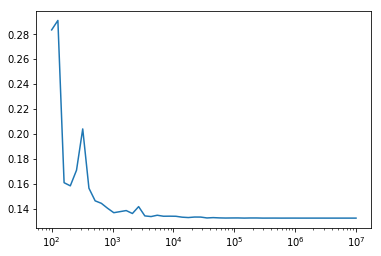

In [13]:
plt.plot(N_runs_total,KL_results)
plt.xscale("log")

It seems it has a weird shape, for interpret this result is is necessary we average over many realizations and see how the distance is decreasing

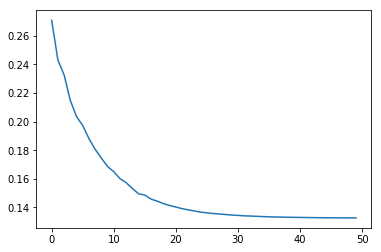

In [14]:
uniform=np.ones(9)/9
N_tests=1000
results=np.zeros(50)
for i in range(N_tests):
    N_runs_total =np.logspace(2,5,num=50)
    KL_results=[]
    for N_runs in N_runs_total:
        site = random.randint(0,8) # the part where it starts is now random
        histogram=[]
        for run in range(int(N_runs)):
            histogram.append(site)
            # End of graphical output
            site = neighbor[site][random.randint(0, 3)]
        P,bins=np.histogram(histogram,density=True,bins=9)
        KL_results.append(KL_divergence(P,uniform))
    for j in range(len(KL_results)):
        results[j]+=KL_results[j]/N_tests
plt.plot(results)        

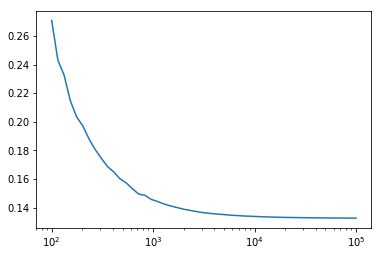

In [16]:
plt.plot(N_runs_total,results)
plt.xscale("log")

In [ ]:
# nbi:hide_in
# nbi:hide_out
from matplotlib import animation

fig, ax = plt.subplots(figsize=(6, 6))

N_runs = 10
sigma=0.4 
s_map = [(1.0, 1.0), (2.0, 1.0), (3.0, 1.0), 
         (1.0, 2.0), (2.0, 2.0), (3.0, 2.0), 
         (1.0, 3.0), (2.0, 3.0), (3.0, 3.0)]

neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]

#ax.set_axis('scaled')
def evolve(site=8):
    site=neighbor[site][ random.randint(0, 3)]
    return site
def init():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_axis_off()
    return fig,

def animate(i):
    print(i)
    site=evolve()
    ax.clear()
    plt.title("Time {}".format(i))
    cir = plt.Circle(s_map[site], radius=sigma, fc='r')
    ax.add_patch(cir)
    ax.plot([0.5, 3.5], [1.5, 1.5], 'b')
    ax.plot([0.5, 3.5], [2.5, 2.5], 'b')
    ax.plot([1.5, 1.5], [0.5, 3.5], 'b')
    ax.plot([2.5, 2.5], [0.5, 3.5], 'b')
    ax.plot([3.5,3.5],[0.5,3.5],"b")
    ax.plot([0.5,0.5],[0.5,3.5],"b")
    ax.plot([0.5,3.5],[0.5,0.5],"b")
    ax.plot([0.5,3.5],[3.5,3.5],"b")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_axis_off()
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=8, interval=1, blit=True)
ani.save('pebble.gif',writer='imagemagick',fps=100/50)
plt.show()

In [187]:
# nbi:hide_in
# nbi:hide_out
sigma=0.4 
s_map = [(1.0, 1.0), (2.0, 1.0), (3.0, 1.0), 
         (1.0, 2.0), (2.0, 2.0), (3.0, 2.0), 
         (1.0, 3.0), (2.0, 3.0), (3.0, 3.0)]

neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
site=8
for i in range(100):
    fig, ax = plt.subplots(figsize=(6, 6))
    cir = plt.Circle(s_map[site], radius=sigma, fc='r')
    plt.gca().add_patch(cir)
    plt.plot([0.5, 3.5], [1.5, 1.5], 'b')
    plt.plot([0.5, 3.5], [2.5, 2.5], 'b')
    plt.plot([1.5, 1.5], [0.5, 3.5], 'b')
    plt.plot([2.5, 2.5], [0.5, 3.5], 'b')
    plt.plot([3.5,3.5],[0.5,3.5],"b")
    plt.plot([0.5,0.5],[0.5,3.5],"b")
    plt.plot([0.5,3.5],[0.5,0.5],"b")
    plt.plot([0.5,3.5],[3.5,3.5],"b")
    plt.xticks([])
    plt.yticks([])
    ax.axis('off')
    plt.axis('scaled')
    plt.title("Evolution at t={}".format(i))
    plt.savefig("Pebble/{}.png".format(i))
    site=neighbor[site][ random.randint(0, 3)]
    
    plt.close()